# Text Classification - IMDB

## Install and import TensorFlow (2.15.00)

In [2]:
! pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.14.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorflow_io_gcs_filesystem-0.36.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadat

In [3]:
import tensorflow as tf

2024-02-12 18:17:49.436985: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-12 18:17:49.438470: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 18:17:49.457490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 18:17:49.457509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 18:17:49.458141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Download IMDB dataset

In [4]:
URL = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

In [5]:
dataset = tf.keras.utils.get_file('aclImdb_v1', URL,
                                  untar=True, cache_dir='./data/raw',
                                  cache_subdir='imdb')

84125825/84125825 [==============================] - 24s 0us/step


In [6]:
import os

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

dataset_dir

'./data/raw/imdb/aclImdb'

In [7]:
os.listdir(dataset_dir)

['imdbEr.txt', 'train', 'imdb.vocab', 'README', 'test']

In [8]:
train_dir = os.path.join(dataset_dir, 'train')

train_dir

'./data/raw/imdb/aclImdb/train'

In [9]:
os.listdir(train_dir)

['unsup',
 'neg',
 'pos',
 'unsupBow.feat',
 'urls_neg.txt',
 'labeledBow.feat',
 'urls_pos.txt',
 'urls_unsup.txt']

## Load IMDB dataset

In [10]:
with open(os.path.join(train_dir, 'pos', '1181_9.txt')) as f:
    print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [ ]:
import shutil

shutil.rmtree(os.path.join(train_dir, 'unsup'))

In [13]:
batch_size = 32
SEED = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(train_dir,
                                                          batch_size=batch_size,
                                                          validation_split=.2,
                                                          subset='training',
                                                          seed=SEED)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [17]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print('Review', text_batch.numpy()[i])
        print('Label', label_batch.numpy()[i])
        print('\n')

Review b'Silent Night, Deadly Night 5 is the very last of the series, and like part 4, it\'s unrelated to the first three except by title and the fact that it\'s a Christmas-themed horror flick.<br /><br />Except to the oblivious, there\'s some obvious things going on here...Mickey Rooney plays a toymaker named Joe Petto and his creepy son\'s name is Pino. Ring a bell, anyone? Now, a little boy named Derek heard a knock at the door one evening, and opened it to find a present on the doorstep for him. Even though it said "don\'t open till Christmas", he begins to open it anyway but is stopped by his dad, who scolds him and sends him to bed, and opens the gift himself. Inside is a little red ball that sprouts Santa arms and a head, and proceeds to kill dad. Oops, maybe he should have left well-enough alone. Of course Derek is then traumatized by the incident since he watched it from the stairs, but he doesn\'t grow up to be some killer Santa, he just stops talking.<br /><br />There\'s a 

In [19]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(train_dir,
                                                        batch_size=batch_size,
                                                        validation_split=.2,
                                                        subset='validation',
                                                        seed=SEED)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [20]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(train_dir,
                                                         batch_size=batch_size)

Found 25000 files belonging to 2 classes.


## Prepare IMDB dataset

In [21]:
import string
import re

def custom_standardization(input_data):
    lower_case = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lower_case, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, 
                                    '[%s]' % re.escape(string.punctuation), '')

In [22]:
max_features = 10000
sequence_length = 250

vectorize_layer = tf.keras.layers.TextVectorization(standardize=custom_standardization, 
                                                    max_tokens=max_features, 
                                                    output_mode='int', 
                                                    output_sequence_length=sequence_length)

In [24]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [25]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    
    return vectorize_layer(text), label

In [26]:
text_batch, label_batch = next(iter(raw_train_ds))

first_review, first_label = text_batch[0], label_batch[0]

print('Review', first_review)
print('Label', raw_train_ds.class_names[first_label])
print('Vectorized Review', vectorize_text(first_review, first_label))

Review tf.Tensor(b'Recipe for one of the worst movies of all time: a she-male villain who looks like it escaped from the WWF, has terrible aim with a gun that has inconsistent effects (the first guy she shoots catches on fire but when she shoots anyone else they just disappear) and takes time out to pet a deer. Then you got the unlikable characters, 30 year old college students, a lame attempt at a surprise ending and lots, lots more. Avoid at all costs.', shape=(), dtype=string)
Label neg
Vectorized Review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[9257,   15,   28,    5,    2,  241,   91,    5,   30,   58,    4,
           1, 1011,   36,  262,   38,    9, 3891,   35,    2,    1,   43,
         382, 5223,   16,    4, 1113,   12,   43, 5739,  300,    2,   83,
         225,   55, 3209, 3898,   20,  973,   18,   51,   55, 3209,  250,
         320,   34,   40, 4386,    3,  294,   58,   44,    6, 2911,    4,
        6757,   92,   22,  184,    2, 4916,  100, 1221,  336,  161, 

In [27]:
print('777 =>', vectorize_layer.get_vocabulary()[777])
print('Vocabulary size', len(vectorize_layer.get_vocabulary()))

777 => thriller
Vocabulary size 10000


In [29]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

`.cache()` keeps data in memory after it's loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

`.prefetch()` overlaps data preprocessing and model execution while training.

In [30]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Build and compile the model

In [31]:
embedding_dim = 16

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_features, embedding_dim),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 dropout_1 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
________________

1. The first layer is an `Embedding` layer. This layer takes the integer-encoded reviews and looks up an embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (`batch`, `sequence`, `embedding`). To learn more about embeddings, check out the [Word embeddings](https://www.tensorflow.org/text/guide/word_embeddings) tutorial.

2. Next, a `GlobalAveragePooling1D` layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.

3. The last layer is densely connected with a single output node.

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # 'binary_crossentropy'
              metrics=tf.metrics.BinaryAccuracy(threshold=.0))

In [38]:
r = model.fit(train_ds,
              validation_data=val_ds,
              epochs=10)

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6621 - binary_accuracy: 0.6962 - val_loss: 0.6129 - val_binary_accuracy: 0.7684
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5463 - binary_accuracy: 0.8030 - val_loss: 0.4966 - val_binary_accuracy: 0.8244
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4434 - binary_accuracy: 0.8454 - val_loss: 0.4190 - val_binary_accuracy: 0.8480
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3776 - binary_accuracy: 0.8668 - val_loss: 0.3728 - val_binary_accuracy: 0.8620
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3344 - binary_accuracy: 0.8790 - val_loss: 0.3441 - val_binary_accuracy: 0.8674
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3028 - binary_accuracy: 0.8898 - val_loss: 0.3248 - val_binary_accuracy: 0.8730
Epoch 7/10
625/625 [==============================] - 1s 1ms/ste

## Train and evaluate

In [39]:
model.evaluate(test_ds)

782/782 [==============================] - 1s 760us/step - loss: 0.2300 - binary_accuracy: 0.9150


[0.22998566925525665, 0.9149600267410278]

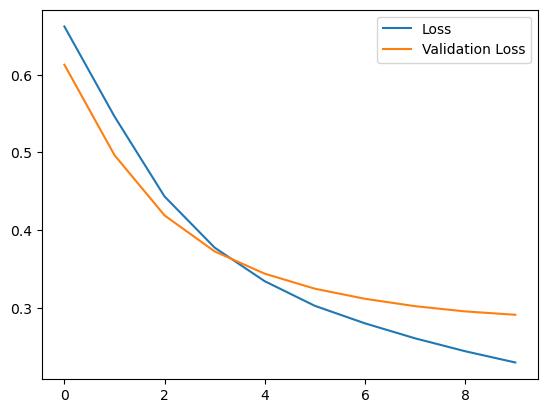

In [42]:
from matplotlib import pyplot as plt

plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')

plt.legend()

plt.show()

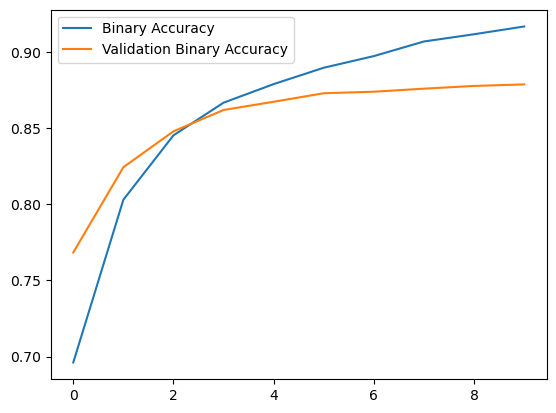

In [43]:
plt.plot(r.history['binary_accuracy'], label='Binary Accuracy')
plt.plot(r.history['val_binary_accuracy'], label='Validation Binary Accuracy')

plt.legend()

plt.show()

## Export the model

In [44]:
export_model = tf.keras.models.Sequential([
    vectorize_layer,
    model,
    tf.keras.layers.Activation('sigmoid')
])

export_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 250)               0         
 ctorization)                                                    
                                                                 
 sequential (Sequential)     (None, 1)                 160017    
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 160017 (625.07 KB)
Trainable params: 160017 (625.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
export_model.compile(optimizer='adam',
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                     metrics=['accuracy'])

In [46]:
loss, accuracy = export_model.evaluate(raw_test_ds)

print('Loss', loss)
print('Accuracy', accuracy)

782/782 [==============================] - 1s 1ms/step - loss: 0.2300 - accuracy: 0.9150
Loss 0.22998568415641785
Accuracy 0.9149600267410278


## Inference on new data

In [47]:
new_examples = [
    'The movie was great!!',
    'The movie was okay',
    'The movie was terrible'
]

export_model.predict(new_examples)

1/1 [==============================] - 0s 57ms/step


array([[0.6125015 ],
       [0.43482158],
       [0.35252908]], dtype=float32)